<p style="ont-size: 14pt; color: blue; font-family: 'Times New Roman';">
    This is a noebook to double-check the totals of a global file with and without VLM.
    Since no vlm component in the global, the data must be the same with the difference as zero
</p>

---

In [1]:
region='global'; loc=0;
wf='wf1e'
ssp='ssp585'
#
path=f'/scratch/pk695/FACTS/002_fork/facts/experimentsNZ/nzOG.2307/{ssp}/output/'
dFILE1=f'{ssp}.total.workflow.{wf}.{region}.nc'
dFILE2=f'{ssp}.total.workflow.{wf}NOVLM.{region}.nc'

In [2]:
import xarray as xr
import numpy as np
d_nc1=xr.open_dataset(path+dFILE1)
d_nc2=xr.open_dataset(path+dFILE2)

In [3]:
slc1=d_nc1['sea_level_change'].values
slc2=d_nc2['sea_level_change'].values
#
time=d_nc2['years'].values
#
def ptile(slcIP):
    ptiles_50 = []
    for col in range(slcIP.shape[1]):
        column_data = slcIP[:, col, loc]
        ptile_50 = np.percentile(column_data, 50)
        ptiles_50.append(ptile_50)
    return np.array(ptiles_50)

In [4]:
slc1_50p = ptile(slc1)
slc2_50p = ptile(slc2)
slcDIF_50p = slc1_50p-slc2_50p

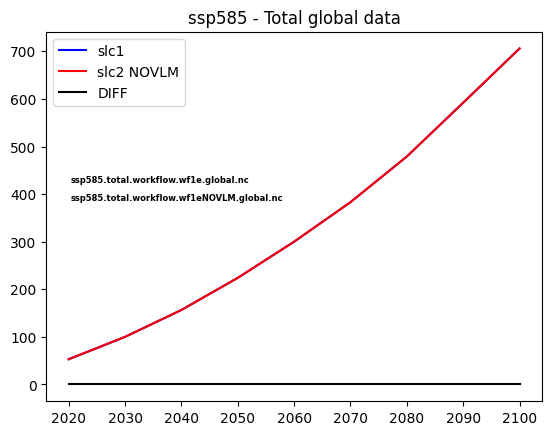

In [5]:
import matplotlib.pyplot as plt
plt.plot(time, slc1_50p, label='slc1',color='blue')
plt.plot(time, slc2_50p, label='slc2 NOVLM',color='red')
plt.plot(time, slcDIF_50p, label='DIFF',color='black')
plt.title(f'{ssp} - Total {region} data')
plt.text(.05, .6, f'{dFILE1}' ,transform=plt.gca().transAxes, fontweight='bold', fontsize=6, ha='left', va='center', color='black')
plt.text(.05, .55, f'{dFILE2}' ,transform=plt.gca().transAxes, fontweight='bold', fontsize=6, ha='left', va='center', color='black')
plt.legend()
plt.show()